In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv ('PRSA_data_2010.1.1-2014.12.31.csv')
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


# Punto 1
1. Diga qué índices serían pertienentes tener y pongalos.

#### Se podría hacer una indexación por las variables de fecha, agrupando por la suma de las variables pm2.5, DEWP, TEMP, PRES, Iws, Is, Ir. Adicionalmente se podría colorar las direcciones del viento ( variable cbwd) en las columnas del data frame

In [3]:
df2 = df.pivot_table(index=['year','month'],
                     columns= 'cbwd',
                     values=['pm2.5','DEWP','TEMP','PRES','Iws','Is','Ir'], aggfunc=np.sum)
df2.head()

DEWP                    Ir               Is      ...      PRES  \
cbwd          NE    NW    SE    cv  NE   NW   SE  cv NE  NW  ...        SE   
year month                                                   ...             
2010 1     -1691 -8596  -948 -1423   0    0    0   0  0  53  ...   82041.0   
     2     -2273 -2746 -1984 -1838   0    0    0   0  0  21  ...  211558.0   
     3      -879 -2308 -1982  -750  20    9   96  28  0  67  ...  313881.0   
     4       -25 -2134   -53  -186  21  131   23   7  0   0  ...  274329.0   
     5       512  1124  2785  1272  52  101  158  87  0   0  ...  315683.0   

                        TEMP                           pm2.5           \
cbwd              cv      NE      NW      SE      cv      NE       NW   
year month                                                              
2010 1      101716.0  -759.0 -2749.0  -411.0  -666.0  6562.0  30410.0   
     2      163426.0  -357.0  -558.0   -21.0  -356.0  6354.0  17197.0   
     3      134672.0   204.0   718.0  1204.0   324.0  4494.0  21001.0   
     4       79444.0   640.0  3064.0  3354.0   723.0  6388.0  14258.0   
     5      138169.0  1080.0  5031.0  6701.0  2687.0  4899.0  15245.0   

                              
cbwd             SE       cv  
year month                    
2010 1       9111.0  12976.0  
     2      21223.0  20470.0  
     3      28032.0  13190.0  
     4      29239.0   7576.0  
     5      30010.0  13891.0  

[5 rows x 28 columns]

# Punto 2
Elimine registros que tengan NA en la columna "pm2.5"

In [4]:
df = df.dropna(subset=['pm2.5'])
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


# Punto 3
Realice un describe de todas las variables por año. Además de realizar un gráfico como boxplot con el que pueda comparar los resultados dados.

### PM 2.5

In [5]:
pm2_5 = df.loc[:,['year','pm2.5']]
pm2_5.groupby('year').describe()

pm2.5                                                      
       count        mean        std  min   25%   50%    75%    max
year                                                              
2010  8091.0  104.045730  92.281185  1.0  35.0  79.0  147.0  980.0
2011  8032.0   99.071340  92.967298  2.0  27.0  71.0  139.0  595.0
2012  8295.0   90.545871  81.745087  0.0  25.0  69.0  132.0  994.0
2013  8678.0  101.712376  98.070477  2.0  32.0  71.5  138.0  886.0
2014  8661.0   97.734557  93.531528  2.0  28.0  72.0  133.0  671.0

Text(0.5, 1.0, 'pm 2.5 por año')

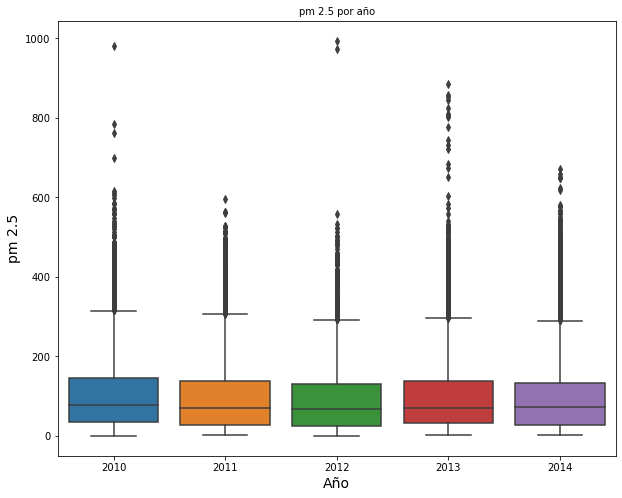

In [6]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="year", 
            y="pm2.5", 
            data=pm2_5)
plt.ylabel("pm 2.5", size=14)
plt.xlabel("Año", size=14)
plt.title("pm 2.5 por año", size=10)

### DEWP

In [7]:
DEWP = df.loc[:,['year','DEWP']]
DEWP.groupby('year').describe()

DEWP                                                  
       count      mean        std   min   25%  50%   75%   max
year                                                          
2010  8091.0  1.352120  14.584996 -28.0 -11.0  1.0  15.0  28.0
2011  8032.0  2.033118  14.503209 -27.0 -10.0  2.0  16.0  28.0
2012  8295.0  1.953707  14.561339 -28.0 -11.0  3.0  15.0  27.0
2013  8678.0  1.342590  14.360272 -33.0 -11.0  0.0  15.0  26.0
2014  8661.0  2.073086  14.159683 -40.0  -9.0  4.0  15.0  25.0

Text(0.5, 1.0, 'DEWP por año')

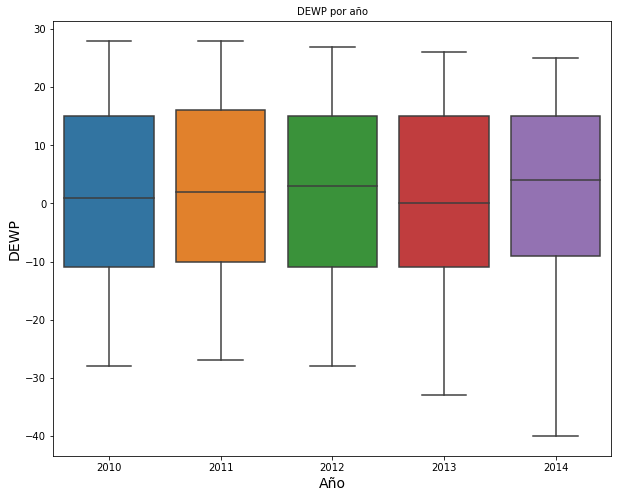

In [8]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="year", 
            y="DEWP", 
            data=DEWP)
plt.ylabel("DEWP", size=14)
plt.xlabel("Año", size=14)
plt.title("DEWP por año", size=10)

### TEMP

In [9]:
TEMP = df.loc[:,['year','TEMP']]
TEMP.groupby('year').describe()

TEMP                                                   
       count       mean        std   min  25%   50%   75%   max
year                                                           
2010  8091.0  11.313805  12.684701 -19.0  0.0  11.0  23.0  41.0
2011  8032.0  12.407869  12.095837 -15.0  2.0  14.0  23.0  36.0
2012  8295.0  12.109946  12.339970 -17.0  1.0  14.0  23.0  38.0
2013  8678.0  12.383614  12.033222 -17.0  2.0  13.0  23.0  38.0
2014  8661.0  13.709156  11.616259 -13.0  3.0  15.0  23.0  42.0

Text(0.5, 1.0, 'TEMP por año')

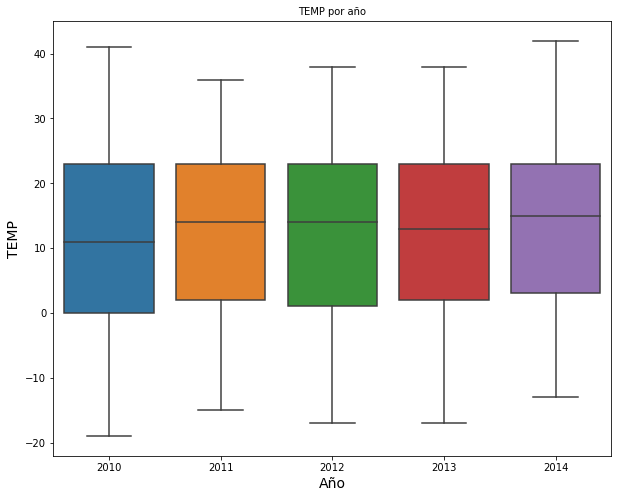

In [10]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="year", 
            y="TEMP", 
            data=TEMP)
plt.ylabel("TEMP", size=14)
plt.xlabel("Año", size=14)
plt.title("TEMP por año", size=10)

### PRES

In [11]:
PRES = df.loc[:,['year','PRES']]
PRES.groupby('year').describe()

PRES                                                               
       count         mean        std    min     25%     50%     75%     max
year                                                                       
2010  8091.0  1016.291373   9.797649  994.0  1009.0  1015.0  1023.0  1043.0
2011  8032.0  1017.461653  11.296902  993.0  1007.0  1018.0  1027.0  1045.0
2012  8295.0  1016.080289  10.025194  992.0  1008.0  1016.0  1024.0  1041.0
2013  8678.0  1015.817066  10.506757  991.0  1007.0  1016.0  1024.0  1046.0
2014  8661.0  1016.614017   9.756248  993.0  1008.0  1016.0  1025.0  1039.0

Text(0.5, 1.0, 'PRES por año')

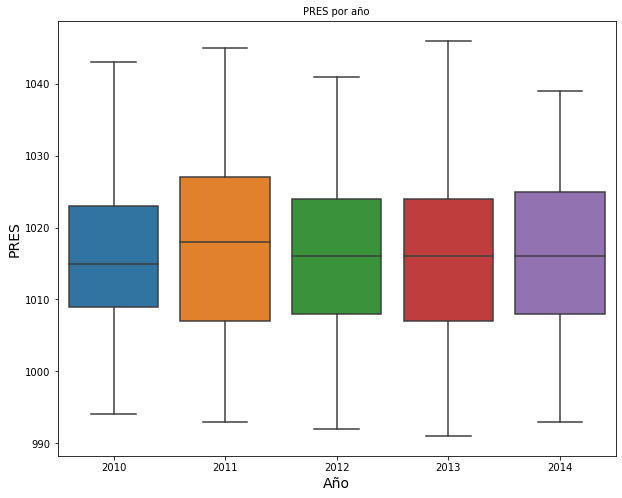

In [12]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="year", 
            y="PRES", 
            data=PRES)
plt.ylabel("PRES", size=14)
plt.xlabel("Año", size=14)
plt.title("PRES por año", size=10)

### cbwd

In [13]:
cbwd = df.loc[:,['year','cbwd']]
count = cbwd.groupby('year').describe()
count

cbwd                 
     count unique top  freq
year                       
2010  8091      4  NW  2887
2011  8032      4  NW  2900
2012  8295      4  SE  2930
2013  8678      4  SE  3025
2014  8661      4  SE  3186

In [14]:
print('Al ser una variable categorica no tiene sentido hacer un boxplot')

Al ser una variable categorica no tiene sentido hacer un boxplot


### Iws

In [15]:
Iws = df.loc[:,['year','Iws']]
Iws.groupby('year').describe()

Iws                                                       
       count       mean        std   min   25%   50%    75%     max
year                                                               
2010  8091.0  29.214860  56.150098  0.45  1.79  7.14  27.72  565.49
2011  8032.0  25.491912  49.820456  0.45  1.79  6.25  24.13  445.66
2012  8295.0  24.610321  49.794085  0.45  1.79  5.81  24.14  454.62
2013  8678.0  21.058177  47.598791  0.45  1.79  4.92  18.79  490.38
2014  8661.0  19.465400  43.837185  0.45  1.79  4.90  17.00  441.18

Text(0.5, 1.0, 'Iws por año')

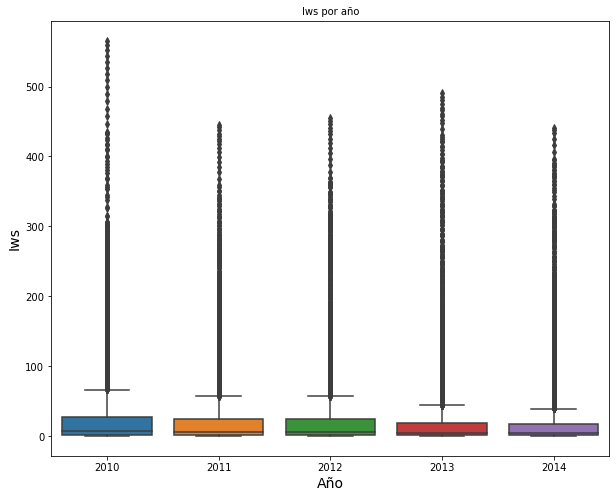

In [16]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="year", 
            y="Iws", 
            data=Iws)
plt.ylabel("Iws", size=14)
plt.xlabel("Año", size=14)
plt.title("Iws por año", size=10)

### IS

In [17]:
Is = df.loc[:,['year','Is']]
Is.groupby('year').describe()

Is                                              
       count      mean       std  min  25%  50%  75%   max
year                                                      
2010  8091.0  0.077123  1.019457  0.0  0.0  0.0  0.0  27.0
2011  8032.0  0.056399  0.748339  0.0  0.0  0.0  0.0  20.0
2012  8295.0  0.076070  0.866199  0.0  0.0  0.0  0.0  19.0
2013  8678.0  0.035262  0.460145  0.0  0.0  0.0  0.0  11.0
2014  8661.0  0.034292  0.708804  0.0  0.0  0.0  0.0  23.0

Text(0.5, 1.0, 'Is por año')

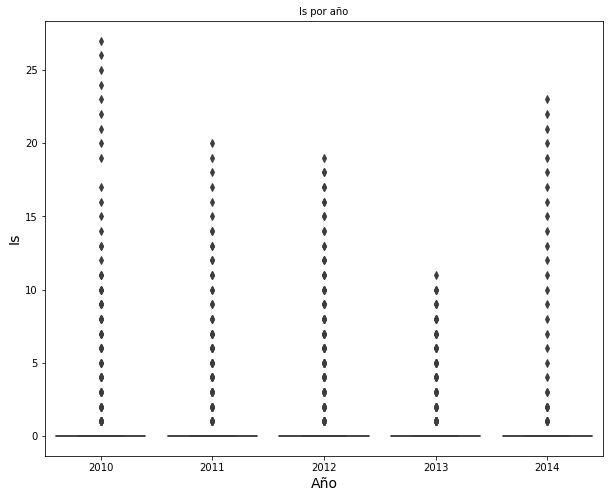

In [18]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="year", 
            y="Is", 
            data=Is)
plt.ylabel("Is", size=14)
plt.xlabel("Año", size=14)
plt.title("Is por año", size=10)

### Ir

In [19]:
Ir = df.loc[:,['year','Ir']]
Ir.groupby('year').describe()

Ir                                              
       count      mean       std  min  25%  50%  75%   max
year                                                      
2010  8091.0  0.269312  1.836257  0.0  0.0  0.0  0.0  36.0
2011  8032.0  0.149278  1.110730  0.0  0.0  0.0  0.0  23.0
2012  8295.0  0.265943  1.766490  0.0  0.0  0.0  0.0  32.0
2013  8678.0  0.161904  1.150911  0.0  0.0  0.0  0.0  25.0
2014  8661.0  0.132548  1.034723  0.0  0.0  0.0  0.0  23.0

Text(0.5, 1.0, 'Ir por año')

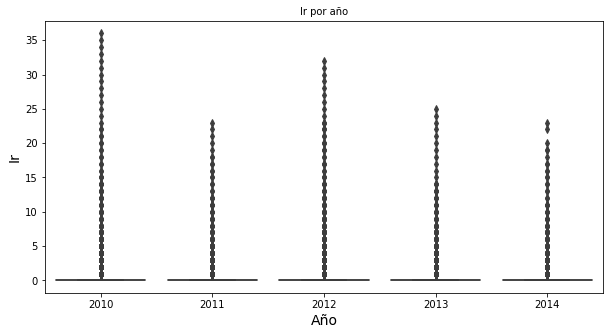

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="year", 
            y="Ir", 
            data=Ir)
plt.ylabel("Ir", size=14)
plt.xlabel("Año", size=14)
plt.title("Ir por año", size=10)

# punto 4
Realice un gráfico de disperción de las variables "pm2.5" y "TEMP" con título, labels apropiados y color rojo para los datos. Describa: ¿Qué se puede inferir de dicho gráfico?

Text(0.5, 1.0, 'pm 2.5 vs Temperatura')

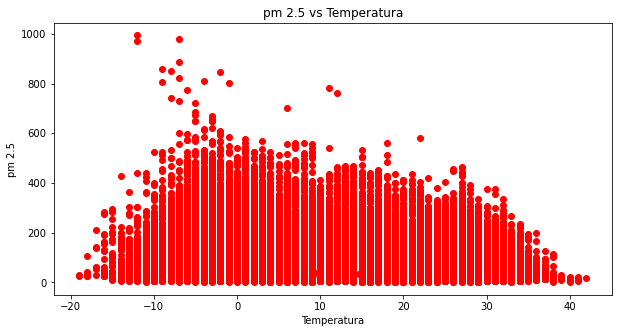

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x = df['TEMP'], y = df['pm2.5'],color='red')
plt.xlabel("Temperatura")
plt.ylabel("pm 2.5")
plt.title('pm 2.5 vs Temperatura')

No existe una relación lineal entre la temperatura y el PM 2.5, podria icluso a llegar a ser una relacion del tipo $$PM 2.5 = \alpha_0+\alpha_1\sin(Temp)+\varepsilon$$

### Punto 5
Calcule la probabilidad de encontrar en la Base de datos el valor de pm2.5 encima de 120

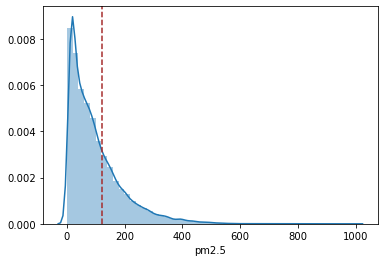

In [22]:
from seaborn import distplot
distplot(df.loc[:,'pm2.5'])
plt.axvline(120, 0, color='brown', linestyle='--')

In [23]:
data = df[df['pm2.5'] > 120]

print('Hay',len(data),'registros de pm 2.5 mayores a 120 y un total de', len(df),
      'de registros no nulos para pm 2.5 \n así la probabilidad de encontrar un valor de pm2.5 mayor a 120 en la BD es de:',
      round(len(data)/len(df),3) )

Hay 12483 registros de pm 2.5 mayores a 120 y un total de 41757 de registros no nulos para pm 2.5 
 así la probabilidad de encontrar un valor de pm2.5 mayor a 120 en la BD es de: 0.299


### Punto 6
Agrupe por año el valor de la variable "pm2.5", calcule el promedio y ordene la base de datos de manera ascendente por el promedio.


In [24]:
pm2_5=df.groupby(['year']).mean()
pm2_5=pm2_5.sort_values(by=['pm2.5'], ascending=True)
pm2_5.head()

,No,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
year,,,,,,,,,,,
2012,21860.769379,6.452200,15.471248,11.506088,90.545871,1.953707,12.109946,1016.080289,24.610321,0.076070,0.265943
2014,39429.862487,6.505715,15.729708,11.504676,97.734557,2.073086,13.709156,1016.614017,19.465400,0.034292,0.132548
2011,13201.776768,6.601096,15.966633,11.509836,99.071340,2.033118,12.407869,1017.461653,25.491912,0.056399,0.149278
2013,30677.221249,6.517516,15.674464,11.497580,101.712376,1.342590,12.383614,1015.817066,21.058177,0.035262,0.161904
2010,4354.141268,6.494747,15.590656,11.493511,104.045730,1.352120,11.313805,1016.291373,29.214860,0.077123,0.269312
